In [1]:
import pandas as pd
import numpy as np
!pip install geopandas
import geopandas as gpd
!pip install folium
import folium
import matplotlib.pyplot as plt
!pip install WordCloud
from wordcloud import WordCloud as wc
import seaborn as sns

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
jang = pd.read_csv('C:/k_digital/team/장애인 비율 통계.csv',encoding='euc-kr',index_col='구별')
jang.head(2)

,총인구,장애인인구,장애인비율
구별,,,
종로구,161869,18201,11.244278
중구,136488,17136,12.554950


In [4]:
jan=pd.read_csv('C:/k_digital/team/장애인시설정리.csv',encoding='euc-kr',index_col='구별')

In [5]:
jan.head()

,주출입구,주차구역,장애인승강기,장애인화장실
구별,,,,
중구,1,1,3,1
성북구,1,3,0,0
강남구,3,3,0,0
강동구,1,0,0,0
용산구,3,0,0,0


In [6]:
seoul_gdf = gpd.read_file('C:/k_digital/team/LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shx', crs='EPSG:4326')
seoul_gdf1 = gpd.read_file('C:/k_digital/team/2019/TL_DSPSN_FCLTY_ST_2019.shx', crs='EPSG:4326')
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=10)
seoul_map1 = folium.Map(location=[37.5665, 126.9780], zoom_start=10)
folium.GeoJson(seoul_gdf).add_to(seoul_map)
folium.GeoJson(seoul_gdf1).add_to(seoul_map1)
folium.GeoJson(seoul_gdf1).add_to(seoul_map)
seoul_map

In [7]:
seoul = gpd.read_file('C:/Users/NT551_11TH/Desktop/팀플/2019/TL_DSPSN_FCLTY_ST_2019.shx')
seoul.head(2)

,ID,TGRP_CODE,BD_07_NM,ADDR_KOR,TEL_NUM,HMPG_CN,TM_X,TM_Y,geometry
0,2.0,4.0,강남장애인복지관,강남구 개포로 605 (개포동12-10),02-445-8006,www.activeart.or.kr,206498.21074,543618.73207,POINT (206498.211 543618.732)
1,9.0,4.0,성모자애복지관,강남구 헌릉로 757길 35 (율현동 100),02-3411-9581,www.smwelfare.or.kr,210567.99743,541184.60907,POINT (210567.997 541184.609)


In [8]:
jan.head(5)

,주출입구,주차구역,장애인승강기,장애인화장실
구별,,,,
중구,1,1,3,1
성북구,1,3,0,0
강남구,3,3,0,0
강동구,1,0,0,0
용산구,3,0,0,0


- 해당 데이터의 품사를 추출(명사형)

In [9]:
js=pd.read_csv('C:/k_digital/team/장애인시설합계.csv',encoding='euc-kr',index_col='구별')

In [10]:
js.head(2)

,주출입구,주차구역,장애인승강기,장애인화장실
구별,,,,
강남구,1163,937,477,288
강동구,416,601,182,134


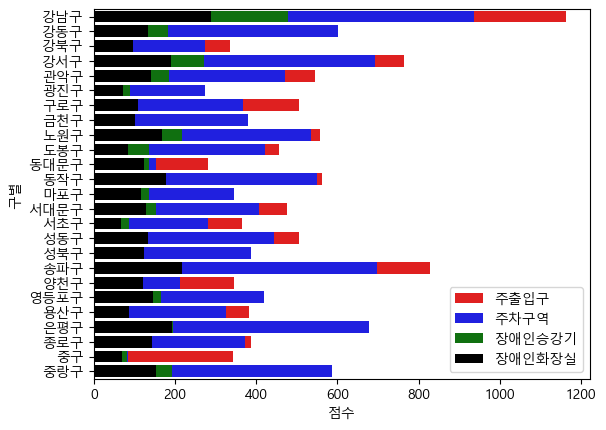

In [11]:
sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()

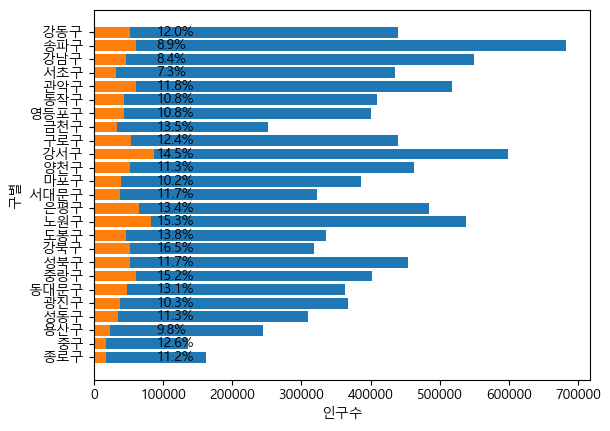

In [12]:
ax = plt.barh(jang.index,jang.총인구,label="총인구")
ax = plt.barh(jang.index,jang.장애인인구,label="장애인인구")
for i, v in enumerate(round(jang['장애인비율'],1)):
    plt.text(v+90000, i, f"{str(v)}%", va='center')
plt.xlabel('인구수')
plt.ylabel('구별')
plt.show()

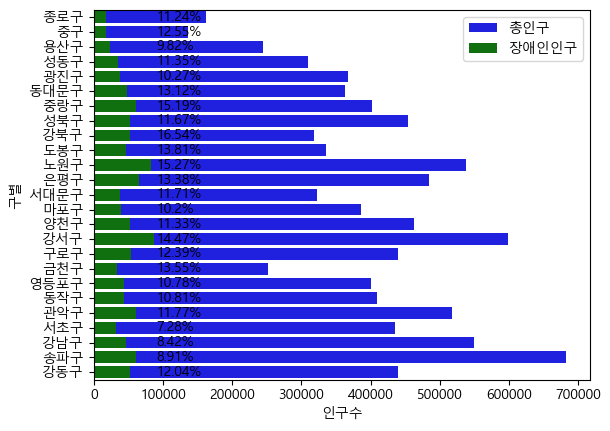

In [13]:
data = {
    '구별': jang.index,
    '총인구': jang['총인구'],
    '장애인인구': jang['장애인인구'],
    '장애인비율': jang['장애인비율']
}
# Seaborn을 사용하여 막대 그래프 그리기
ax = sns.barplot(x='총인구', y='구별', data=data, label='총인구', color='b')
sns.barplot(x='장애인인구', y='구별', data=data, label='장애인인구', color='g')

# 각 막대 위에 값을 표시
for i, v in enumerate(round(data['장애인비율'],2)):
    ax.annotate(f"{str(v)}%", (v + 90000, i), va='center')
plt.xlabel('인구수')
plt.ylabel('구별')
plt.legend()
plt.show()

In [14]:
seoul.head(5)

,ID,TGRP_CODE,BD_07_NM,ADDR_KOR,TEL_NUM,HMPG_CN,TM_X,TM_Y,geometry
0,2.0,4.0,강남장애인복지관,강남구 개포로 605 (개포동12-10),02-445-8006,www.activeart.or.kr,206498.21074,543618.73207,POINT (206498.211 543618.732)
1,9.0,4.0,성모자애복지관,강남구 헌릉로 757길 35 (율현동 100),02-3411-9581,www.smwelfare.or.kr,210567.99743,541184.60907,POINT (210567.997 541184.609)
2,10.0,8.0,성모자애제1주간보호,강남구 헌릉로757길 35 (율현동 110번지),02-3411-9581,http://www.smwelfare.or.kr,210567.99743,541184.60907,POINT (210567.997 541184.609)
3,11.0,8.0,성모자애제2주간보호,강남구 헌릉로757길 35 (율현동 110번지),02-3411-9581,http://www.smwelfare.or.kr,210567.99743,541184.60907,POINT (210567.997 541184.609)
4,12.0,8.0,역삼주간보호센터,강남구 테헤란로8길 36 (역삼동 827-61) 강남문화원 2층,02-518-2270,http://hnwelfare.or.kr/main/sub04_03.html,202821.32529,544115.30951,POINT (202821.325 544115.310)


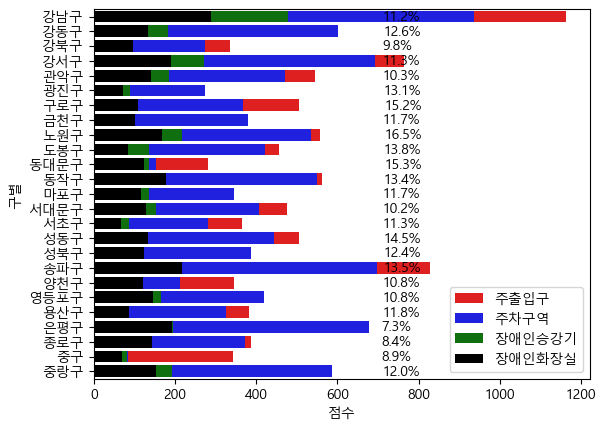

In [21]:
ax=sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
ax=sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
ax=sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
ax=sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')


for i, v in enumerate(round(jang['장애인비율'],1)):
    plt.text(v+700, i, f"{str(v)}%", va='center')
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()



In [75]:
for i in range(len(seoul)):
    seoul.ADDR_KOR = seoul.ADDR_KOR.iloc[:][i][:3]

In [76]:
seoul.head(8)

,ID,TGRP_CODE,BD_07_NM,ADDR_KOR,TEL_NUM,HMPG_CN,TM_X,TM_Y,geometry
0,2.0,4.0,강남장애인복지관,강남구,02-445-8006,www.activeart.or.kr,206498.21074,543618.73207,POINT (206498.211 543618.732)
1,9.0,4.0,성모자애복지관,강남구,02-3411-9581,www.smwelfare.or.kr,210567.99743,541184.60907,POINT (210567.997 541184.609)
2,10.0,8.0,성모자애제1주간보호,강남구,02-3411-9581,http://www.smwelfare.or.kr,210567.99743,541184.60907,POINT (210567.997 541184.609)
3,11.0,8.0,성모자애제2주간보호,강남구,02-3411-9581,http://www.smwelfare.or.kr,210567.99743,541184.60907,POINT (210567.997 541184.609)
4,12.0,8.0,역삼주간보호센터,강남구,02-518-2270,http://hnwelfare.or.kr/main/sub04_03.html,202821.32529,544115.30951,POINT (202821.325 544115.310)
5,14.0,4.0,청음회관,강남구,02-556-4758,www.chungeum.or.kr,203746.91728,545549.14474,POINT (203746.917 545549.145)
6,16.0,4.0,충현복지관,강남구,02-2192-0600,http://www.chw.or.kr,203255.17113,544904.75571,POINT (203255.171 544904.756)
7,17.0,8.0,하상,강남구,02-451-6000,http://www.hasang.org,206637.76267,543674.92745,POINT (206637.763 543674.927)


In [82]:
seoul.ADDR_KOR.unique()

array(['강남구'], dtype=object)

In [84]:
lib = gpd.read_file('C:/Users/NT551_11TH/Desktop/가마우지/B440. 서울시 도서관(공공작은장애인) 공간데이터/B440. 서울시 도서관(공공작은장애인) 공간데이터/2. 파일데이터/2019/TL_LBRRY_2019.shp')

In [96]:
lib.groupby('SIG_NM')['LBRRY_ID'].count()

SIG_NM
강남구     46
강동구     50
강북구     51
강서구     79
관악구     53
광진구     35
구로구     80
금천구     24
노원구     42
도봉구     44
동대문구    37
동작구     48
마포구     50
서대문구    33
서초구     46
성동구     34
성북구     64
송파구     75
양천구     48
영등포구    44
용산구     47
은평구     96
종로구     28
중구      21
중랑구     49
Name: LBRRY_ID, dtype: int64

In [106]:
lib.head(3)

,LBRRY_ID,LBRRY_NM,SIG_NM,ADRES,TELNO,FXNUM,HMPG,CLOSE_DATE,LBRRY_SE,OPNNG_DATE,tm_x,tm_y,geometry
0,1935,강남구립못골도서관,강남구,서울시 강남구 자곡로 116,02-459-5522,None,http://mglib.gangnam.go.kr,"둘째, 넷째 화요일",공공도서관,None,208544.998827,541350.373971,POINT (208544.999 541350.374)
1,1066,강남역삼푸른솔도서관,강남구,서울특별시 강남구 테헤란로8길 36. 4층,02-2051-1178,02-2051-1178,http://ysplib.gangnam.go.kr/,"2,4 주 화요일 및 법정 공휴일",공공도서관,20090612,202833.823508,544116.641606,POINT (202833.824 544116.642)
2,3,국립어린이청소년도서관,강남구,서울특별시 강남구 테헤란로7길 21,02-3413-4800,02-3451-0724,http://www.nlcy.go.kr/,"매월 둘째넷째 월요일, 일요일을 제외한 공휴일",공공도서관,20060628,202625.580690,544605.442417,POINT (202625.581 544605.442)


In [198]:
tour = pd.read_excel('C:/k_digital/team/장애인관광지.xls',index_col='구별')

In [199]:
tour.head()

,콘텐츠명,서브카테고리명
구별,,
중랑구,중랑캠핑숲 매표소,매표소
송파구,올림픽공원 안내서비스,안내서비스
송파구,올림픽공원 장애인용화장실,장애인용 화장실
송파구,올림픽공원 장애인용화장실,장애인용 화장실
송파구,올림픽공원 장애인용화장실,장애인용 화장실


In [200]:
tour['서브카테고리명'].unique()

array(['매표소', '안내서비스', '장애인용 화장실', '휠체어 대여', '장애인용 승강기', '장애인 주차구역',
       '출입구 단차제거', '접근로', nan, '시각장애인 편의', '청각장애인 편의', '보행장애물'],
      dtype=object)

In [201]:
tour_plt = tour.groupby('서브카테고리명').count()

In [202]:
tour_plt.head()

,콘텐츠명
서브카테고리명,
매표소,55
보행장애물,71
시각장애인 편의,33
안내서비스,76
장애인 주차구역,107


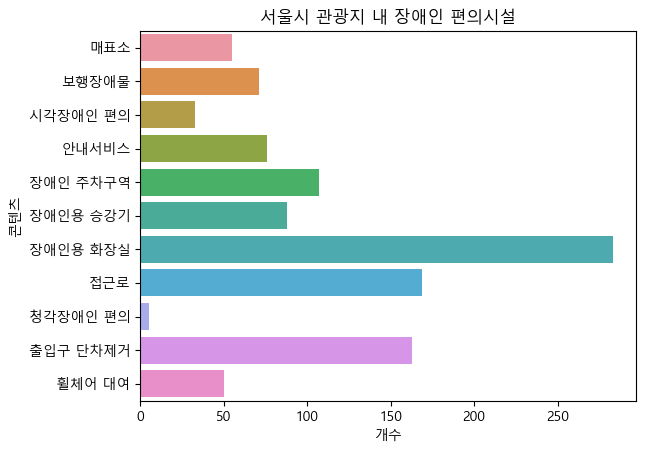

In [203]:
sns.barplot(data=tour_plt,y=tour_plt.index,x=tour_plt['콘텐츠명'])
plt.xlabel('개수')
plt.ylabel('콘텐츠')
plt.title('서울시 관광지 내 장애인 편의시설')
plt.show()

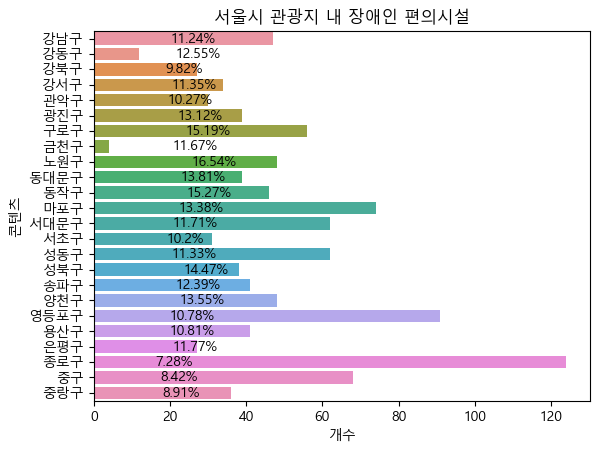

In [237]:
tour_gu = tour.groupby('구별').count()
ap = sns.barplot(data=tour_gu, y = tour_gu.index, x = tour_gu['콘텐츠명'])
plt.xlabel('개수')
plt.ylabel('콘텐츠')
plt.title('서울시 관광지 내 장애인 편의시설')

for i, v in enumerate(round(data['장애인비율'],2)):
    ap.annotate(f"{str(v)}%", (v + 9, i), va='center')
plt.show()

In [248]:
c = jan.groupby('구별')['주출입구'].count()
c

구별
강남구     403
강동구     264
강북구     154
강서구     409
관악구     227
광진구     123
구로구     189
금천구     214
노원구     302
도봉구     233
동대문구    143
동작구     201
마포구     172
서대문구    199
서초구     139
성동구     186
성북구     198
송파구     295
양천구     179
영등포구    205
용산구     137
은평구     276
종로구     192
중구      127
중랑구     225
Name: 주출입구, dtype: int64

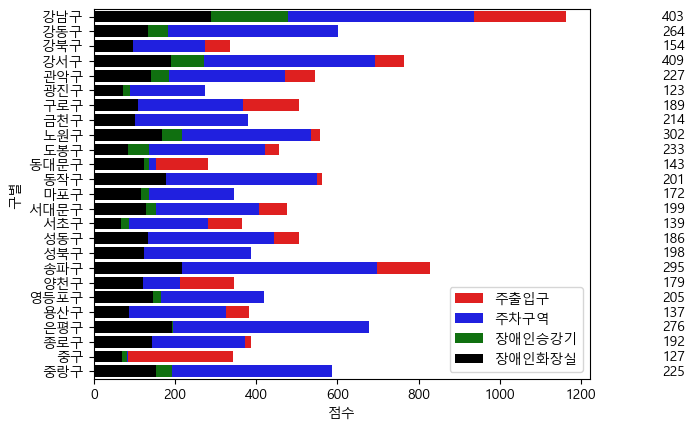

In [269]:
ax=sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
ax=sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
ax=sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
ax=sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')

for i, v in enumerate(c):
    plt.text(1400, i, v, va='center')
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()



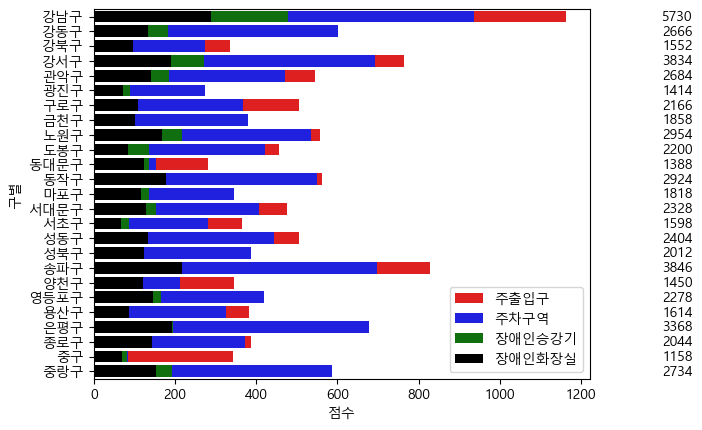

In [272]:
ax=sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
ax=sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
ax=sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
ax=sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')
for i, v in enumerate(js['합계']):
    plt.text(1400, i, v, va='center')
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()



In [261]:
js['합계']=js.sum(axis=1)
js

,주출입구,주차구역,장애인승강기,장애인화장실,합계
구별,,,,,
강남구,1163,937,477,288,5730
강동구,416,601,182,134,2666
강북구,335,273,72,96,1552
강서구,764,692,272,189,3834
관악구,544,472,185,141,2684
광진구,273,273,90,71,1414
구로구,506,367,100,110,2166
금천구,378,379,71,101,1858
노원구,557,536,217,167,2954
